<a href="https://colab.research.google.com/github/2003Yash/time-series-arima/blob/main/Time_series_with_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# create environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA # Auto Regressive Integrated Moving Averages
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Display the first few rows of the dataset
print(data.head())


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [ ]:
# Display summary statistics of the dataset
print(data.describe())

       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


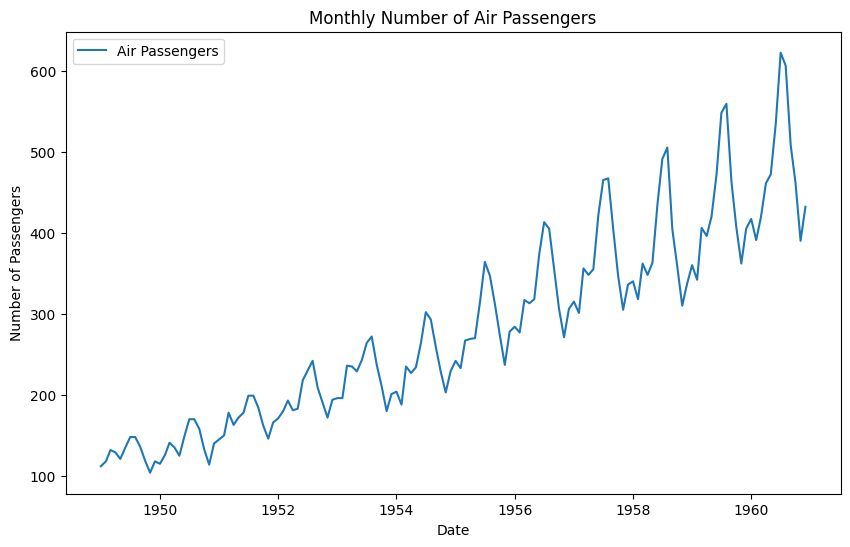

In [ ]:
#plotting the dataset
plt.figure(figsize=(10, 6))
plt.plot(data, label='Air Passengers')
plt.title('Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# A stationary time series has constant mean and variance over time. Since ARIMA requires the series to be stationary,
# we'll check for stationarity using the Augmented Dickey-Fuller test.

result = adfuller(data['Passengers'])

#ADF Statistic in this context provides evidence on whether or not we should reject the null hypothesis of a unit root.
#A more negative ADF Statistic provides stronger evidence against the presence of a unit root, indicating that the time series is stationary, which is a desired property for ARIMA modeling.

print('ADF Statistic:', result[0]) # result[0] indicates ADF value #it should as near to -5 as possible, -5 means stationery data
print('p-value:', result[1]) # result[1] indicates p value If the p-value is less than 0.05, the data is stationary. Otherwise, we need to make it stationary by differencing.

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


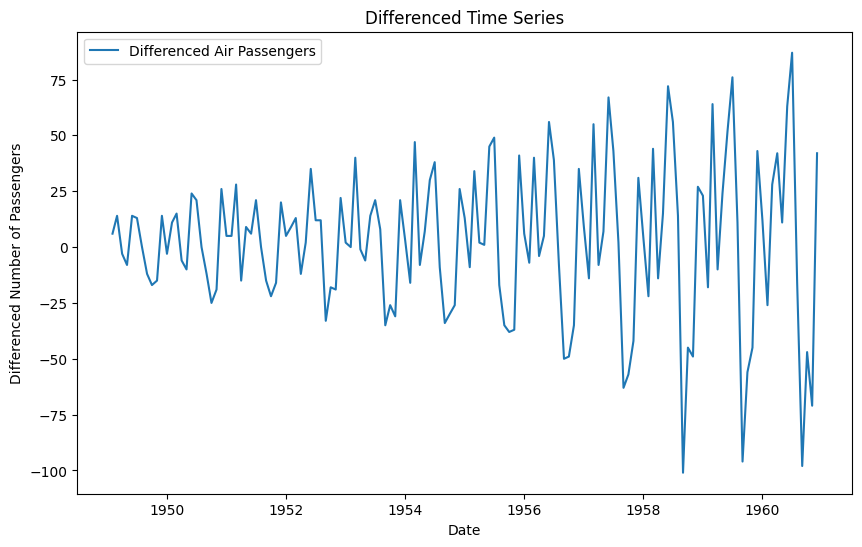

In [ ]:
data_diff = data.diff().dropna()
#If the series is not stationary, we need to difference it. Differencing is a method of making a non-stationary series stationary.

#plotting differenced time series data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Air Passengers')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Number of Passengers')
plt.legend()
plt.show()

In [ ]:
# Check stationarity again
result_diff = adfuller(data_diff['Passengers'])
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

ADF Statistic after differencing: -2.8292668241700047
p-value after differencing: 0.05421329028382478


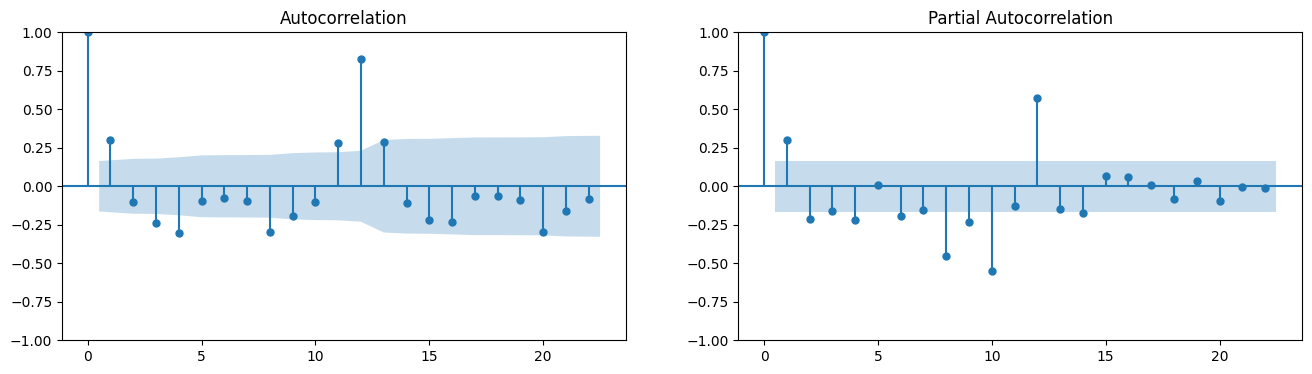

In [ ]:
# ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data_diff, ax=ax[0]) #it tells us how much the current value of the series is related to its past values.
plot_pacf(data_diff, ax=ax[1]) # it isolates the direct relationship between a given lagged value and the current value, ignoring the indirect effects of other lags.
#it simply adjusts the graph to nullify the effects of autocorelation
plt.show()

In [ ]:
model = ARIMA(data, order=(2, 1, 2))

# An ARIMA(p, d, q) model is a combination of these three components:
#AR(p): Autoregressive part that models the relationship between the current value and its previous values -> here The model uses the 2 previous observations (two lag) to predict the current value.
#I(d): Integrated part that makes the time series stationary by differencing it d times -> here The data is differenced once to remove trends and make it stationary.
#MA(q): Moving Average part that models the relationship between the current value and the past forecast errors -> here The model uses the previous forecast error of last 2 forecasts to adjust the current forecast.

model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Sun, 25 Aug 2024   AIC                           1353.347
Time:                        06:47:14   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

In [ ]:
# Forecast
forecast = model_fit.forecast(steps=12) # steps means no of periods into the future to be generated
forecast_index = pd.date_range(start=data.index[-1], periods=12, freq='M') # data.index[-1] refers to the last date in the original dataset
                                                                           # periods  Specifies the number of periods (or date points) to generate in the date range. This should match the number of steps used in the forecast (12 months).
                                                                           # freq Specifies the frequency of the date range. 'M' stands for 'month-end frequency', meaning each date in the range represents the end of a month.

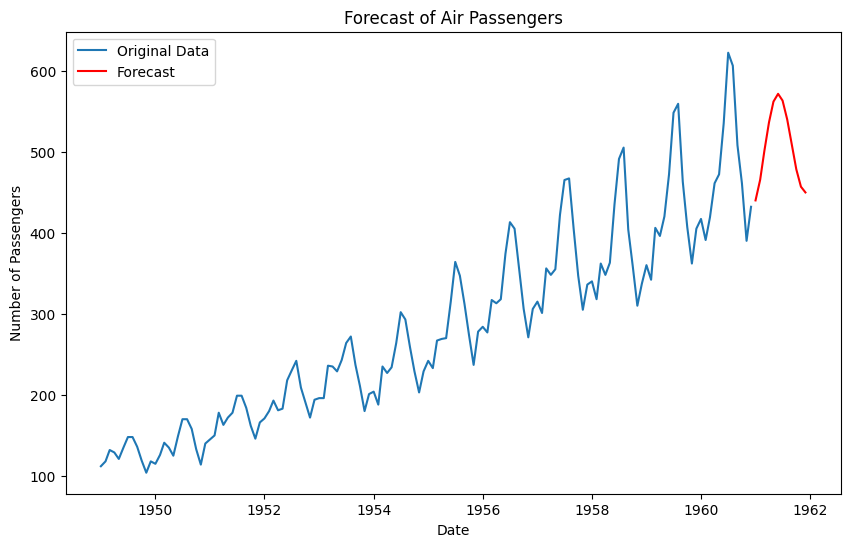

In [ ]:
# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Forecast of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()